# Exploratory data analysis
**Describing, visualizing, correlation analysis, hyphothesis testing**

**Import** data from "data/cleaned.csv"

In [1]:
# Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
import seaborn as sns
import math

from pkg import utils
from pkg import plot

In [2]:
# Importing data

parent = 'data'
filename = 'cleaned.csv'

path = utils.get_path(parent,filename)
df = pd.read_csv(path, index_col=2)


In [3]:
# Runners

run_save = True
final_version= True

run_corr = True
run_rarity_plot = True
run_amino_plot = True
run_corr_amino = True

In [4]:
numericals = df.select_dtypes(include=['number'])
numericals = numericals.columns

categoricals = df.select_dtypes(exclude=['number'])
categoricals = categoricals.columns

In [5]:
print(f"Those data have {df.shape[0]} rows and {df.shape[1]} columns\n")
df.head()

Those data have 13028 rows and 69 columns



,Unnamed: 0,Kingdom,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
DNAtype,,,,,,,,,,,,,,,,,,,,,
0,0,vrl,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
0,1,vrl,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
0,2,vrl,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
0,3,vrl,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
0,4,vrl,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [6]:
df.info()

print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 13028 entries, 0 to 1
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   13028 non-null  int64  
 1   Kingdom      13028 non-null  object 
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  float64
 6   UUC          13028 non-null  float64
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA          

In [7]:
df.describe()

codons = numericals[3:]

In [8]:
dict_kingdom = {'arc':'archae',
                'bct':'bacteria',
                'inv':'invertebrates',
                'mam':'mammals',
                'phg':'bacteriophage',
                'plm':'plasmids',
                'pln':'plants',
                'pri':'primates',
                'rod':'rodents',
                'vrl':'virus',
                'vrt':'vertebrates'}


In [51]:

n_codons = 3


print('-----------')
print(f'Dataset com {df.shape[0]} linhas e {df.shape[1]} colunas')
print('-----------')
print()
non_codons = [x for x in df.columns if x not in codons]
useful_ncod = non_codons[1:-3]

codons_df = df[['Kingdom'] + codons]

db = codons_df.describe()
means = db.loc['mean'].sort_values(ascending=False)
mf_codons = list(means[:n_codons].index)


cols= useful_ncod + mf_codons

print(df[cols].describe().to_markdown())

-----------
Dataset com 13028 linhas e 72 colunas
-----------

|       |   SpeciesID |          Ncodons |           AAA |           AUU |           GAA |
|:------|------------:|-----------------:|--------------:|--------------:|--------------:|
| count |     13028   |  13028           | 13028         | 13028         | 13028         |
| mean  |    130451   |  79605.8         |     0.028504  |     0.0283515 |     0.0282903 |
| std   |    124787   | 719701           |     0.0178897 |     0.0175071 |     0.0143424 |
| min   |         7   |   1000           |     0         |     0         |     0         |
| 25%   |     28850.8 |   1602           |     0.017315  |     0.01636   |     0.01736   |
| 50%   |     81971.5 |   2927.5         |     0.025315  |     0.025475  |     0.026085  |
| 75%   |    222891   |   9120           |     0.03726   |     0.0381125 |     0.0368    |
| max   |    465364   |      4.06626e+07 |     0.14601   |     0.15406   |     0.14489   |


figure saved on  c:\Users\ptons\Code\repositories\codons\reports\codons_corr


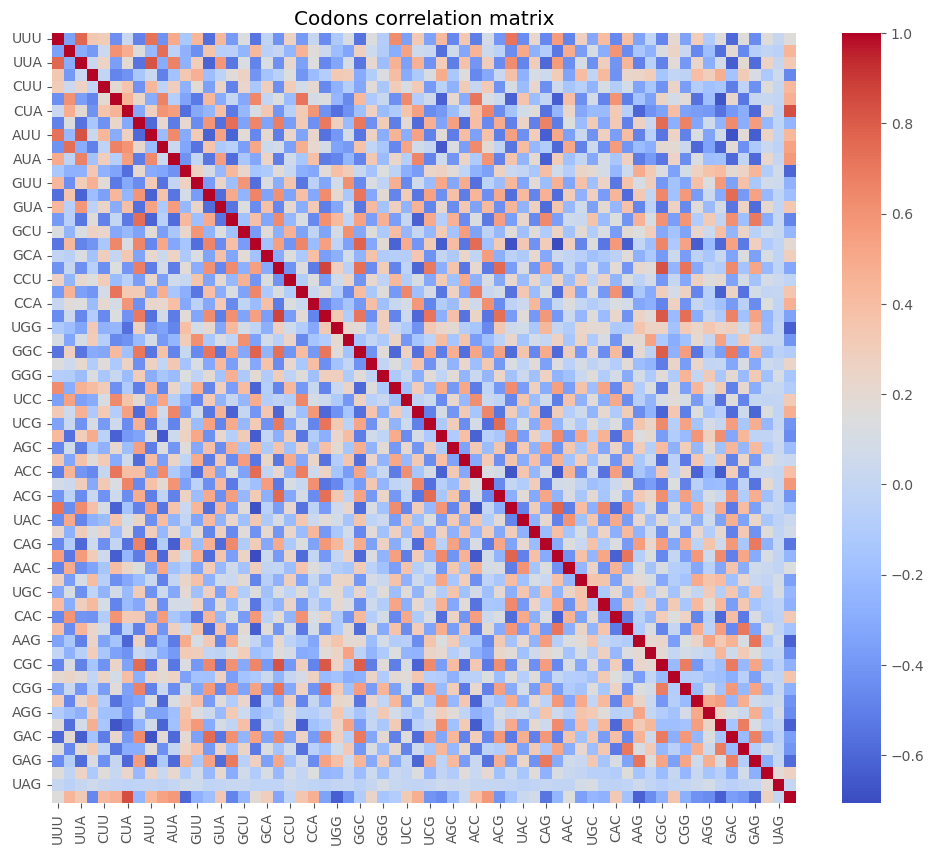

Pair of variables with correlation greater than 0.5:

CCG  GCG    0.869467
GCG  CCG    0.869467
CUA  UGA    0.842416
UGA  CUA    0.842416
GCG  CGC    0.826959
              ...   
UCC  CAC    0.503318
AGG  AGA    0.501930
AGA  AGG    0.501930
UUC  UAC    0.500934
UAC  UUC    0.500934
Length: 334, dtype: float64


In [10]:
if run_corr:

    correlation_matrix = df[codons].corr()
    correlation_matrix

    plot.corr_map(correlation_matrix, final_version=final_version, title="Codons correlation matrix",  savename="codons_corr")

    corr_threshold = 0.5

    high_correlation_pairs = correlation_matrix[(correlation_matrix > corr_threshold) & (correlation_matrix < 1.0)]
    high_correlation_pairs = high_correlation_pairs.unstack().dropna().sort_values(ascending=False)

    print(f"Pair of variables with correlation greater than {corr_threshold}:\n")
    print(high_correlation_pairs)

    


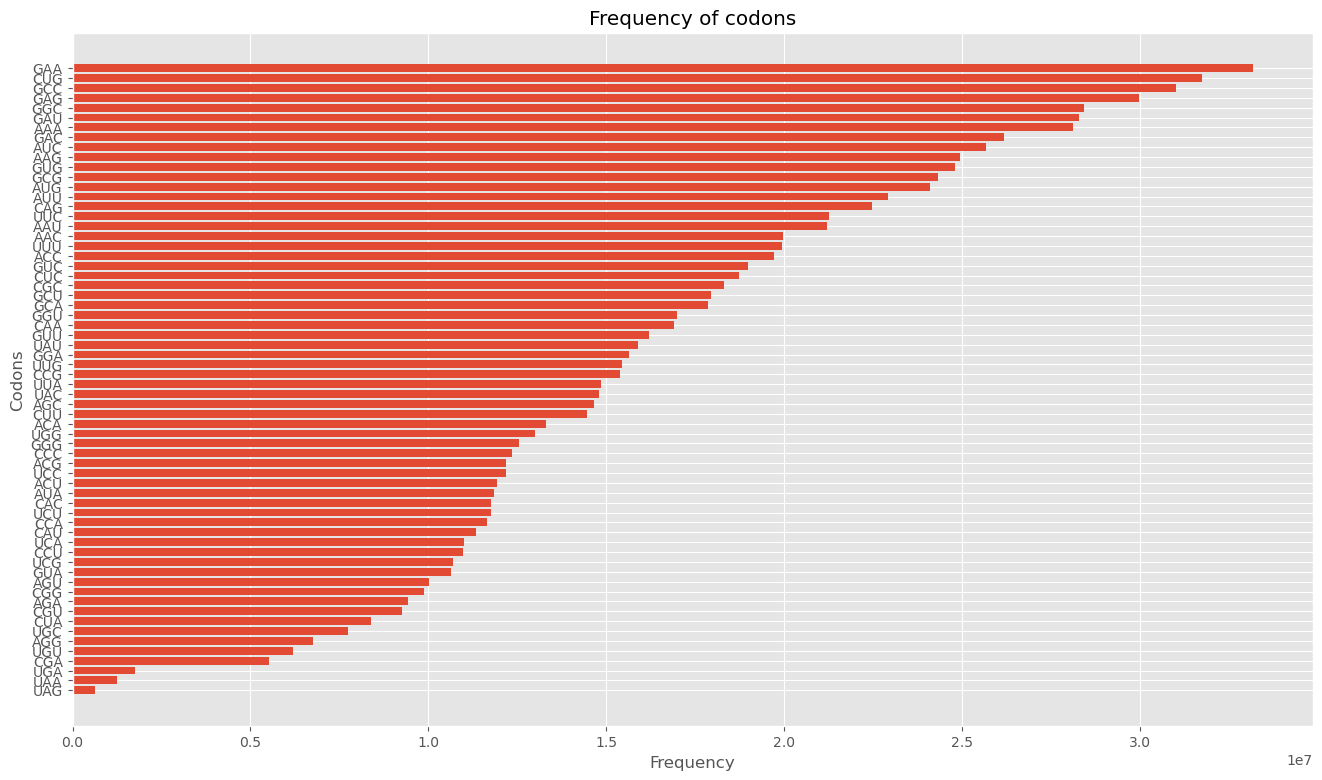

figure saved on  c:\Users\ptons\Code\repositories\codons\reports\freq_codons


In [11]:

codons_dict = {}

for codon in codons:
    codons_dict[codon] = (df[codon]*df["Ncodons"]).sum()

import operator
codons_dict = dict(sorted(codons_dict.items(),key=operator.itemgetter(1)))

codons = list(codons_dict.keys())
value = list(codons_dict.values())

fig, ax = plt.subplots(figsize=(16,9))

ax.barh(codons, value)
plt.xlabel("Frequency")
plt.ylabel("Codons")
plt.title("Frequency of codons")
plt.show()

if run_save:
    plot.save('freq_codons', fig.savefig,
              final_version=final_version)

In [12]:
# Creating df freq_clusters

if run_rarity_plot:

    k_cluster = 3

    jump = round(100/k_cluster)
    cluster_names = [str(i*jump)+'-'+str(i*jump+jump)+'%' for i in range(k_cluster)]
    clusters = {}

    jump = len(codons)//k_cluster+1

    for i in range(k_cluster):
        index = jump * i
        clusters[i] = codons[index:index+jump]

    for i in clusters:
        df[cluster_names[i]] = df[clusters[i]].sum(axis=1)

    columns = ["Kingdom"] + cluster_names
    cluster_df = df[columns]
    freqCluster_df = cluster_df.groupby("Kingdom").mean()

    freqCluster_df.head()

figure saved on  c:\Users\ptons\Code\repositories\codons\reports\rarity_plot.png


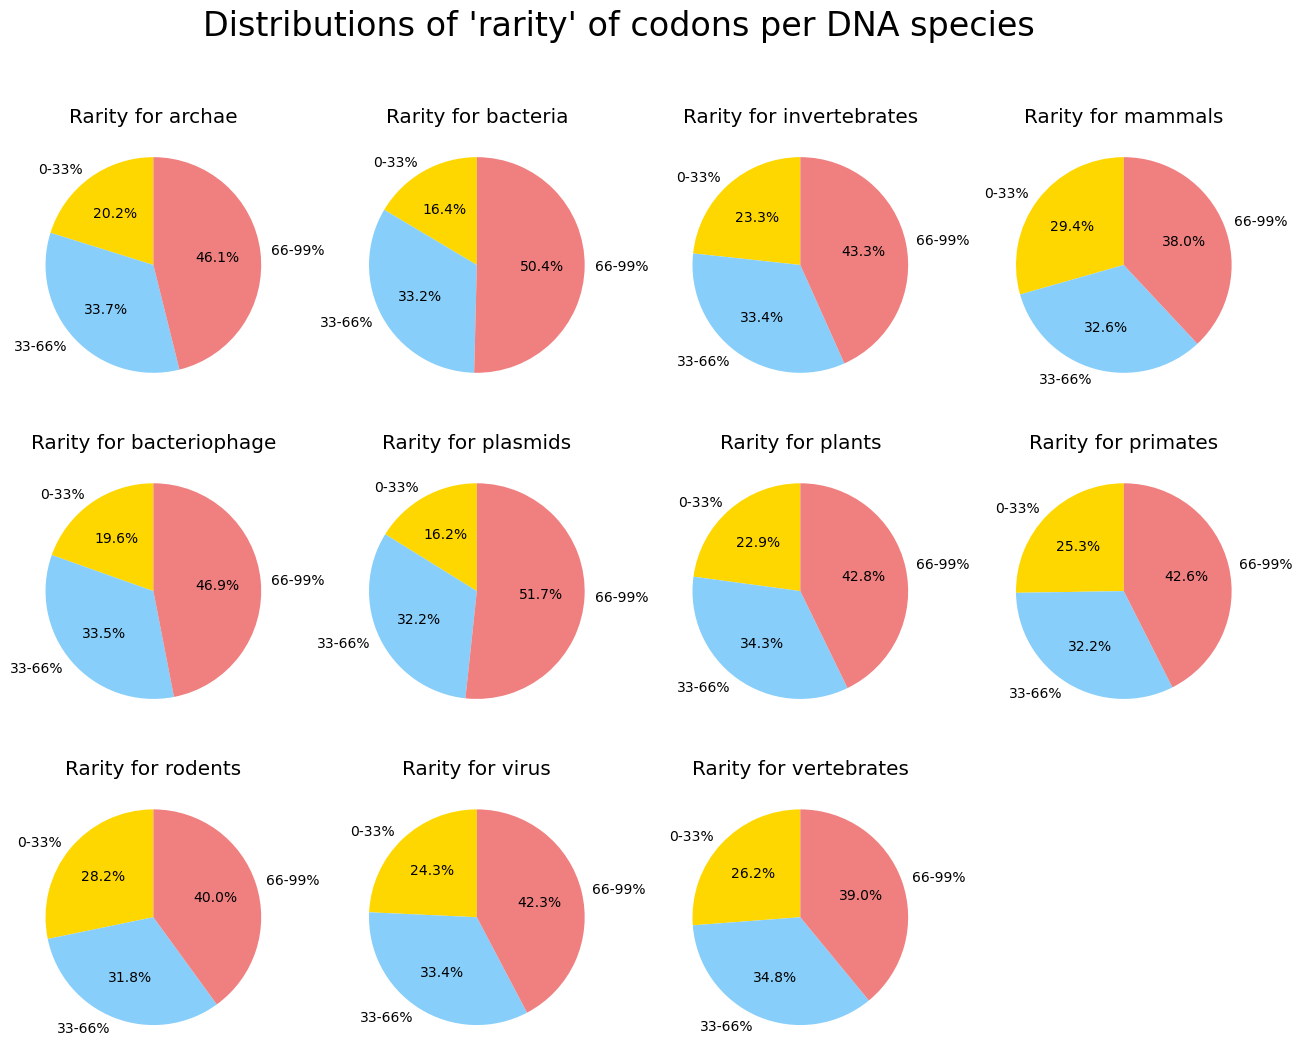

In [13]:
# Plt by species

if run_rarity_plot:
    colors = ['gold', 'lightskyblue', 'lightcoral']

    fig,axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))

    for i, (kingdom, row) in enumerate(freqCluster_df.iterrows()):
        ax = axes[i//4, i % 4]
        ax.pie(row, labels=row.index, autopct='%1.1f%%', colors=colors, startangle=90)
        ax.set_title(f'Rarity for {dict_kingdom[kingdom]}')

    axes[-1,-1].set_visible(False)

    fig.suptitle("Distributions of 'rarity' of codons per DNA species", fontsize=24)

    plot.save('rarity_plot.png', fig.savefig,
              final_version=final_version)
    plt.show()

figure saved on  c:\Users\ptons\Code\repositories\codons\reports\amino_plot.png


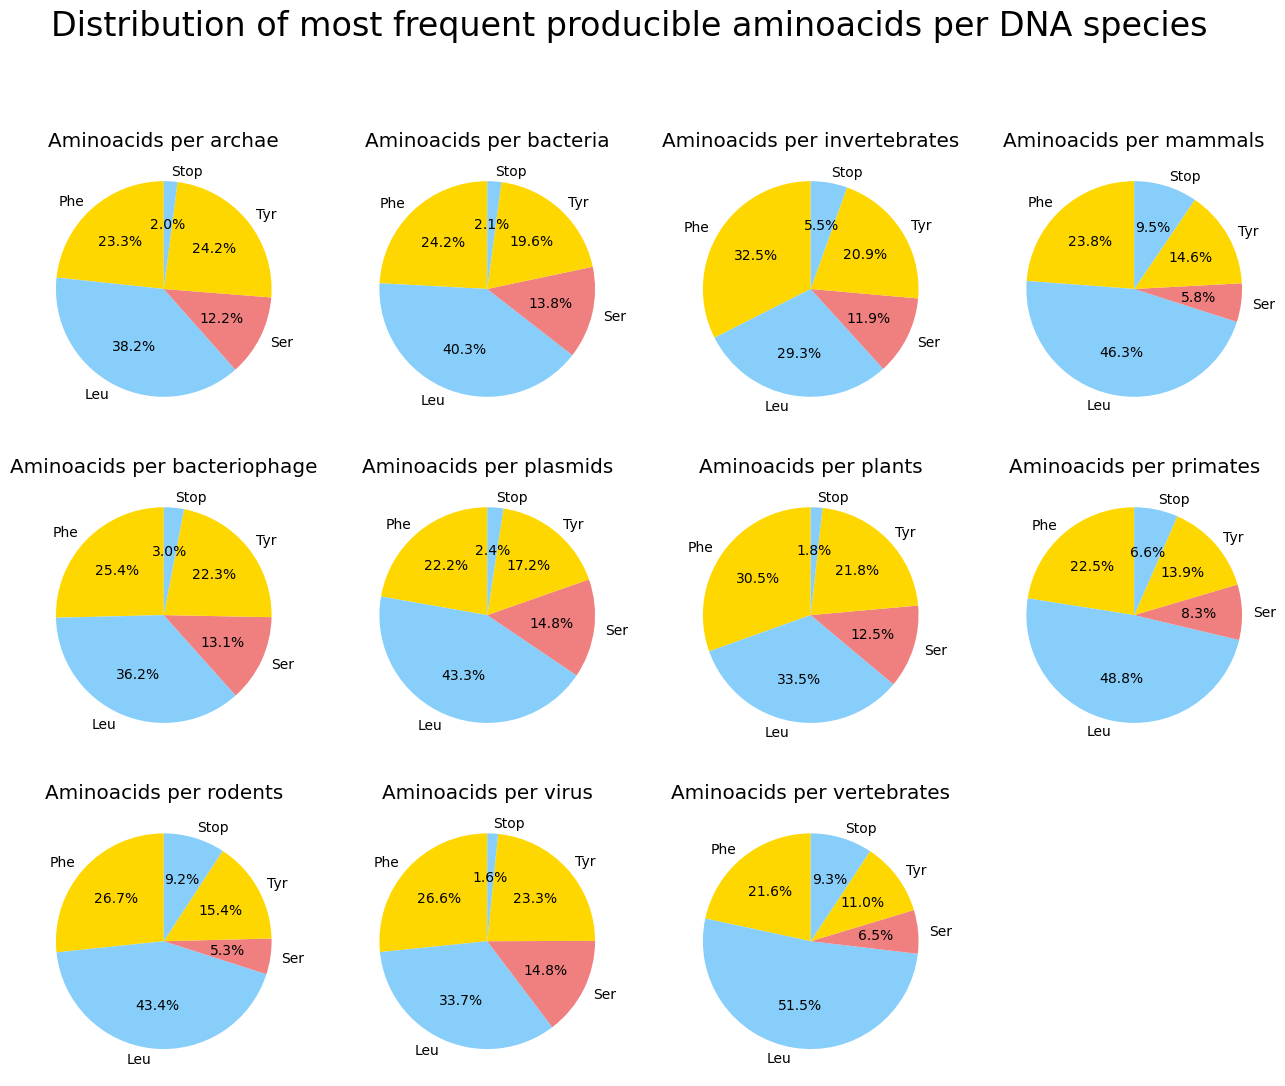

In [14]:

if run_amino_plot:

    prune_factor = 5

    parent = 'data'
    filename = 'amino.csv'

    path = utils.get_path(parent,filename)
    amino_df = pd.read_csv(path, index_col=0)

    amino_df = amino_df.drop(columns="SpeciesName")

    aminos = amino_df.columns[4:]
    prunes = aminos[:prune_factor]

    grouped_df = amino_df.groupby("Kingdom").mean()
    prunned_amino = grouped_df[prunes]
    
    colors = ['gold', 'lightskyblue', 'lightcoral']
    fig,axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))

    for i, (kingdom, row) in enumerate(prunned_amino.iterrows()):
        if i < len(prunned_amino):
            ax = axes[i//4, i % 4]
            ax.pie(row, labels=row.index, autopct='%1.1f%%', colors=colors, startangle=90)
            ax.set_title(f'Aminoacids per {dict_kingdom[kingdom]}')

    axes[-1, -1].set_visible(False)
    fig.suptitle("Distribution of most frequent producible aminoacids per DNA species", y=1, fontsize=24)

    if run_amino_plot:
        plot.save('amino_plot.png', fig.savefig,
                  final_version=final_version)
    plt.show()

figure saved on  c:\Users\ptons\Code\repositories\codons\reports\amino_corr


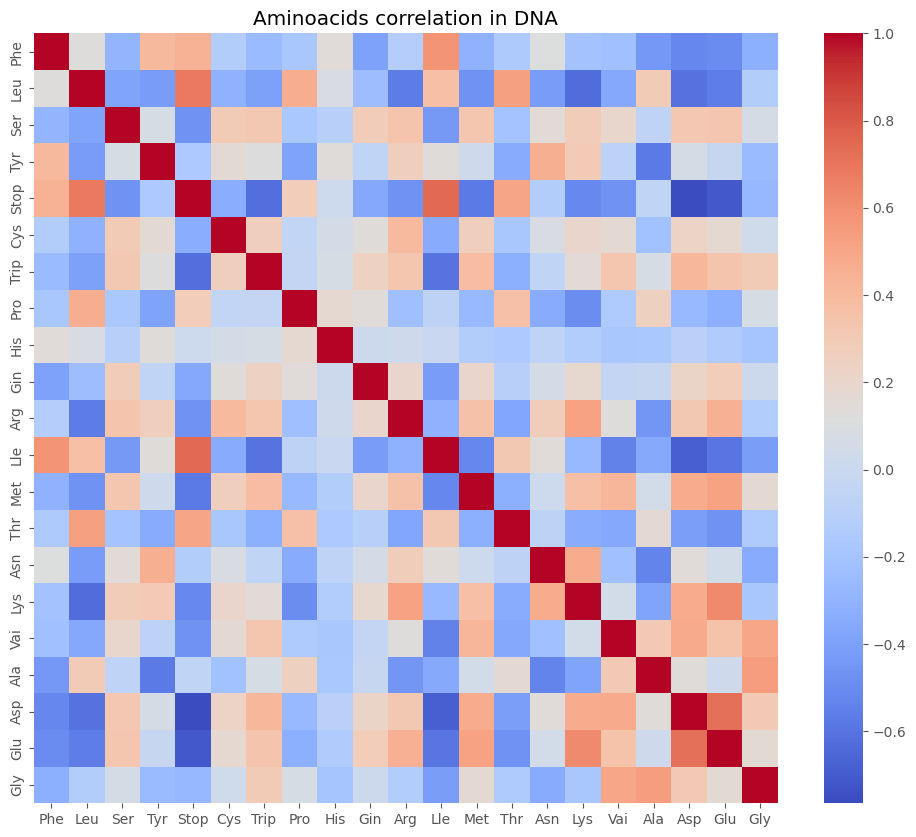

In [15]:
if run_amino_plot:

    correlation_matrix = amino_df[aminos].corr()
    plot.corr_map(correlation_matrix, final_version=final_version, title="Aminoacids correlation in DNA", savename="amino_corr")


In [16]:
# Objetivo:
# Bar plot
# x-axis : espécie
# y-axis : correlação esperada entre aminoácidos

if run_corr_amino:
    kingdoms = set(amino_df['Kingdom'])

    expected_corr = {}
    n_aminos = len(aminos)

    for kingdom in kingdoms:
        expected_corr[dict_kingdom[kingdom]] = 0

    group_df = amino_df.groupby('Kingdom')
    correlation_matrix = group_df[aminos].corr()

    # print(correlation_matrix.to_markdown())

    for aminoA in aminos:
        aminoA_corr = correlation_matrix[aminoA]
        total_corr = 0
        
        for kingdom in kingdoms:
            king_aminoA_corr = aminoA_corr[(kingdom,)]        
            
            for aminoB in aminos:
                if aminoA != aminoB:
                    total_corr += abs(king_aminoA_corr[aminoB])
        
            expected_corr[dict_kingdom[kingdom]] = total_corr


    for key in expected_corr:
        print(f'{key} : {expected_corr[key]}')


plants : 6.780419712924727
invertebrates : 10.279735209089942
virus : 15.544296749188284
mammals : 21.81804179704234
bacteriophage : 25.7053825493758
rodents : 28.595409638151615
archae : 36.8679233540221
plasmids : 44.821215449700986
primates : 49.922833205776826
vertebrates : 56.16452531214487
bacteria : 63.944152375209455


figure saved on  c:\Users\ptons\Code\repositories\codons\reports\amino_cor.png


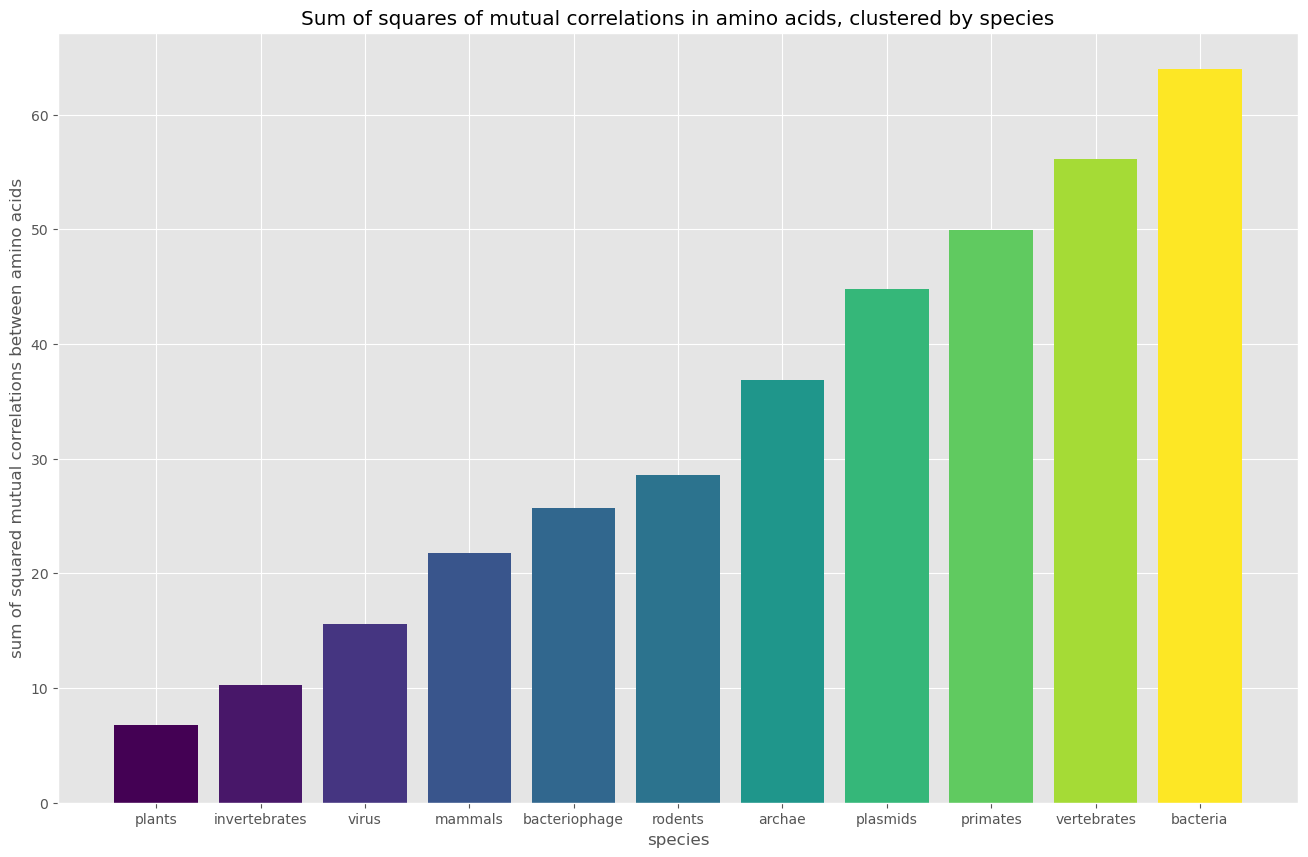

In [17]:
if run_corr_amino:

    fig, ax = plt.subplots(figsize=(16,10))

    amino_corr_df = pd.DataFrame(list(expected_corr.items()), columns=["kingdom", "amino_corr"])


    ax.bar(amino_corr_df['kingdom'], amino_corr_df['amino_corr'], color=viridis((amino_corr_df['amino_corr'] - min(amino_corr_df['amino_corr'])) / (max(amino_corr_df['amino_corr']) - min(amino_corr_df['amino_corr']))))
    plt.title("Sum of squares of mutual correlations in amino acids, clustered by species")
    plt.xlabel("species")
    plt.ylabel("sum of squared mutual correlations between amino acids")

    plot.save('amino_cor.png', fig.savefig,
                final_version=final_version)
    plt.show()


Let $A_i$ an $n \times n$ correlation matrix of codons.
Let $A = \{A_i\} \; : i = 1,\ldots, 11$ a matrix for each $i$-th kingdom

The expected value of correlations is the operation
$E(A)$ such that 
$$
E(A) = \frac{1}{(n-1)!} \sum\limits_{S\in (i,j)} Cor(i,j)
$$

For all possible combinations of two pair correlations betweeen the matrix $A$